In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np

# Data preprocessing and trasformation (ETL)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#Imputer
from sklearn.impute import SimpleImputer

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Artificial Neural Network
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras import backend as K

# Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# Presentazione problema

Partendo dai dati dei clienti di una compagnia cercare di ottimizzare i risultati di una campagna di marketing cercando di predirre chi risponderà positivamente a un'offerta così da massimizzare il profitto della campagna di marketing.

Dataset: [https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign)

In [2]:
pd.set_option("max_colwidth", 200)
pd.read_csv("data/columnsInfo.csv", sep=";")

,Column's name,Description
0,ID,Customer's id
1,Year_Birth,Customer's year of birth
2,Education,Customer’s level of education
3,Marital_Status,Customer’s marital status
4,Income,Customer’s yearly household income
5,Kidhome,Number of small children in customer’s household
6,Teenhome,Number of teenagers in customer’s household
7,Dt_Customer,Date of customer’s enrolment with the company
8,Recency,Number of days since the last purchase
9,MntWines,Amount spent on wine products in the last 2 years


# ETL Processing

Leggo i dati.

In [3]:
dataset = pd.read_csv("data/marketing_campaign.csv", sep=";")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Elimino la colonna *ID* dato che non mi serve e le colonne *Z_CostContact* e *Z_Revenue* dato che contengono lo stesso valore per tutte le osservazioni, quindi inutili.

In [4]:
dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

Mi salvo i valori della variabile target.

In [5]:
dataset_label = dataset['Response']
dataset.drop(columns=['Response'], inplace=True)

Guardo come sono distribuiti i dati per preprocessarli

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:>]], dtype=object)

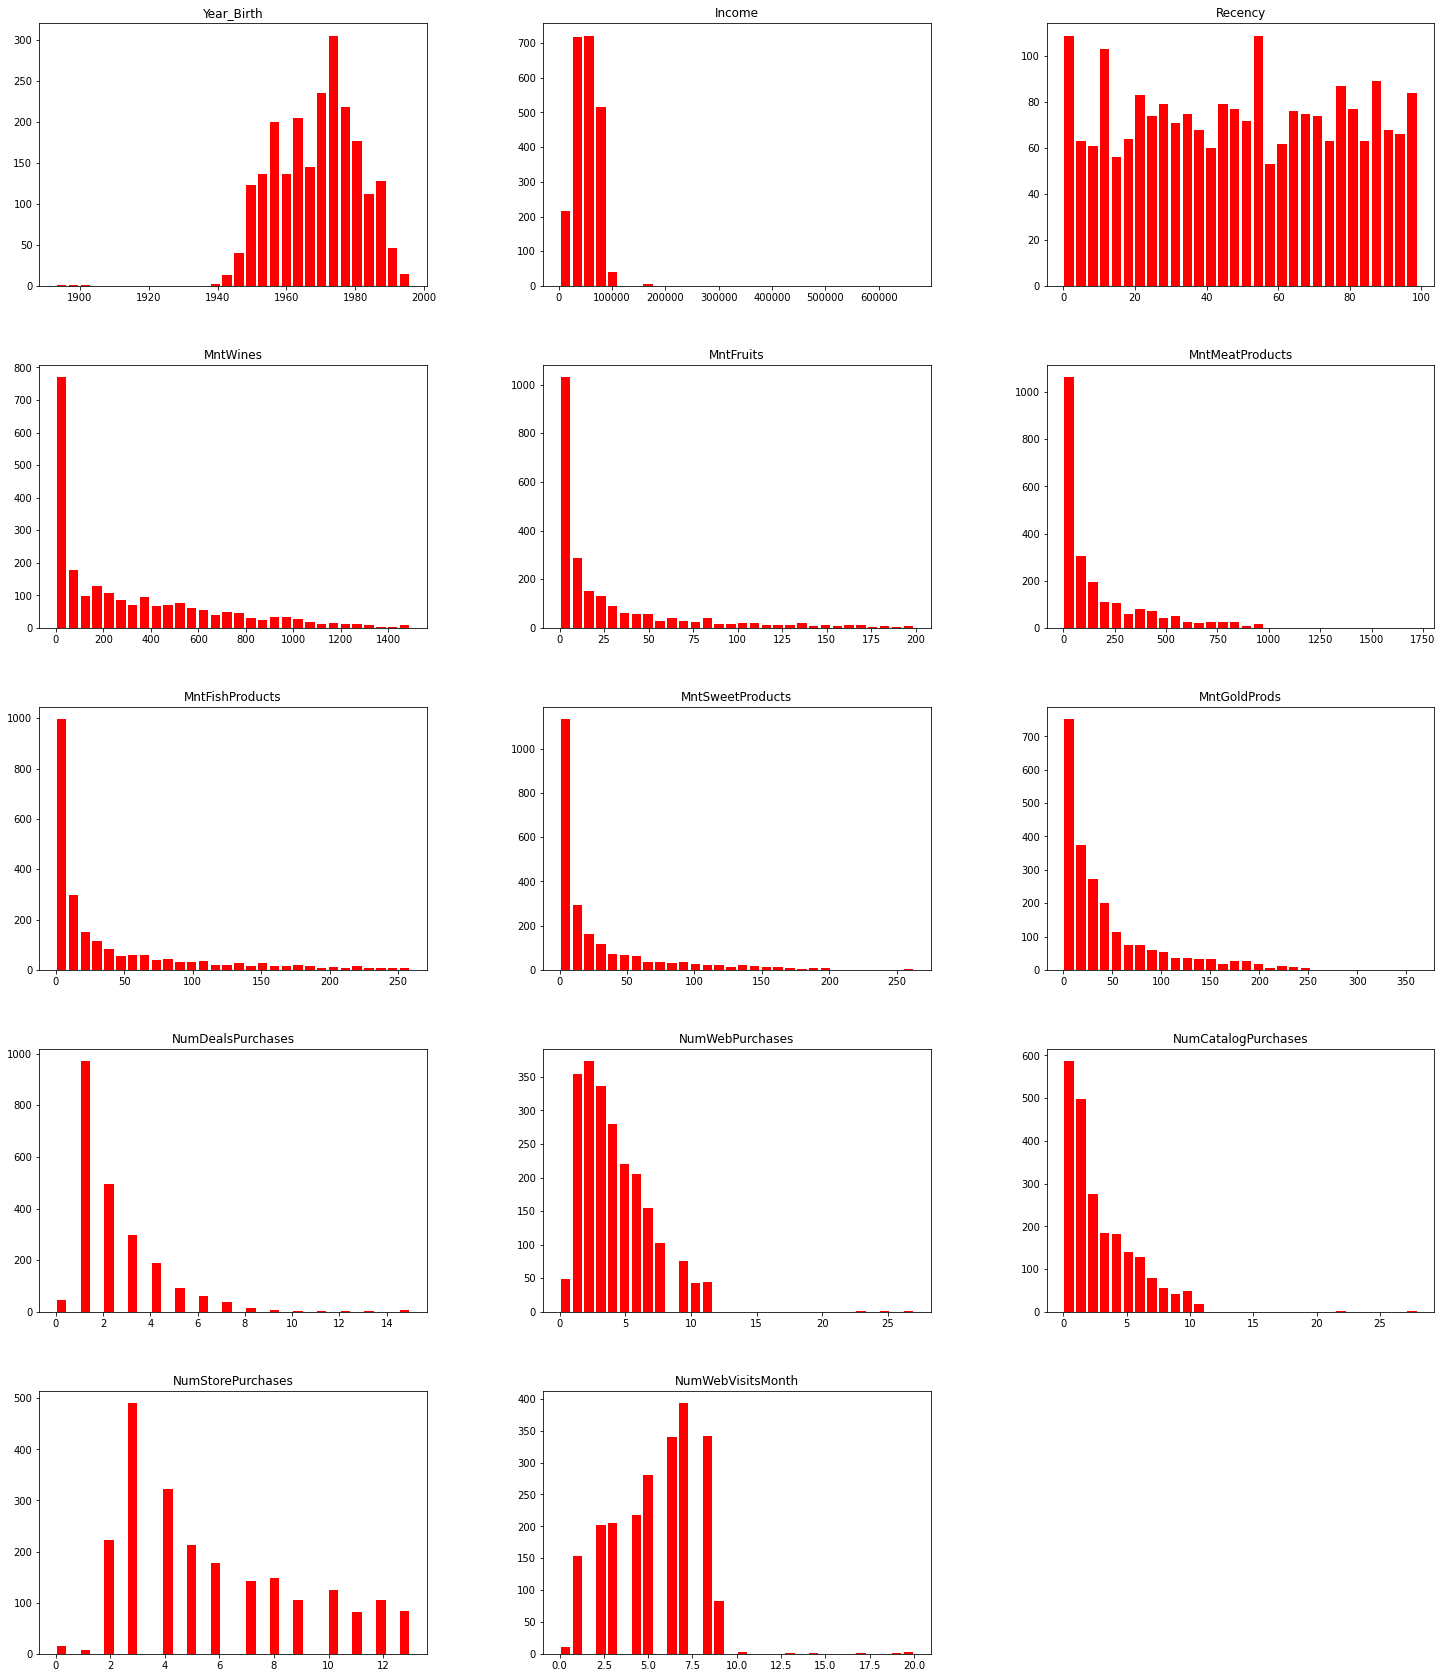

In [7]:
dataset.hist(figsize=(25,30), layout=(5,3), grid=False, bins=30, color='red', rwidth=0.8, column=['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

Creo un trasformer per convertire la colonna *Dt_Customer*, ovvero la data di iscrizione del cliente, in un valore numerico.

Il valore rappresenta quanti mesi sono passati dalla data di raccolta dei dati (01 Gennaio 2015).

In [8]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, startDate = pd.to_datetime("2015-01-01")):
        self.startDate = startDate
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = pd.to_datetime(X.iloc[:,0])
        X_new = pd.DataFrame((self.startDate - X_new).transform(lambda days: days.total_seconds()/(60*60*24*30)))
        return X_new

Scalo i dati con una distribuzione simile a quella di una normale, normalizzo le rimanenti feature.

In [9]:
income_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

date_pipeline = Pipeline([
    ('transformer', DateTransformer()),
    ('scaler', StandardScaler())
])

normal_features = ['NumCatalogPurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
standard_features = ['Year_Birth', 'NumWebPurchases', 'NumWebVisitsMonth']

In [10]:
data_preprocessing = ColumnTransformer([
    ('normal', MinMaxScaler(), normal_features),
    ('standard', StandardScaler(), standard_features),
    ('cat', OneHotEncoder(), ['Education', 'Marital_Status']),
    ('income', income_pipeline, ['Income']),
    ('dateSubscription', date_pipeline, ["Dt_Customer"]),
    ('sparse', MaxAbsScaler(), ['Recency', 'NumStorePurchases'])
],
    remainder = 'passthrough'
)

feature_matrix = data_preprocessing.fit_transform(dataset)

# Algoritmi/modelli da utilizzare

Si utilizzeranno i seguenti modelli di ML:
- Perceptron
- Logistic Regression 
- Support Vector Machine
- Decision Tree
- Bagging con Decision Tree
- Ada Boost con Decision Tree
- Gradient Boosting
- Random Forest
- Voting Classifier con tutti i classificatori precedenti
- Neural Network

Per ogni modello si effettuerà una ottimizzazione dei parametri per massimizzare la metrica **F1** (nelle conclusioni viene spiegato il motivo). I modelli verranno valutati in base al loro overfitting e confrontando le metriche: *accuracy, precision, recall e f1*.

Ogni modello verrà allenato e testato utilizzando una Stratified Shuffle Split con 20 splits.

I valori finali sono la media dei valori delle 20 splits.

In [11]:
final_scores = [] #Name, predictions, train_size, train_scores, test_scores
voting_estimators = []

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [12]:
def drawAccuracy(train_size, train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig=plt.figure(figsize=(12,7))
    ax = fig.add_subplot()

    ax.plot(train_size, train_mean,
             color='blue', marker='+',
             markersize=5, label='Training accuracy')

    ax.fill_between(train_size,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    ax.plot(train_size, test_mean,
             color='green', linestyle='--',
             marker='d', markersize=5,
             label='Validation accuracy')

    ax.fill_between(train_size,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    ax.grid()
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_ylim([0.6, 1.03])

## Perceptron

In [13]:
estimator = Perceptron(n_jobs=-1)

param_grid = {'alpha': [0.00001, 0.0001, 0.001], "penalty": ['l2','l1','elasticnet', None]}
grid_search = GridSearchCV(estimator=estimator, param_grid = param_grid, cv = cv, scoring = 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'alpha': 1e-05, 'penalty': None}


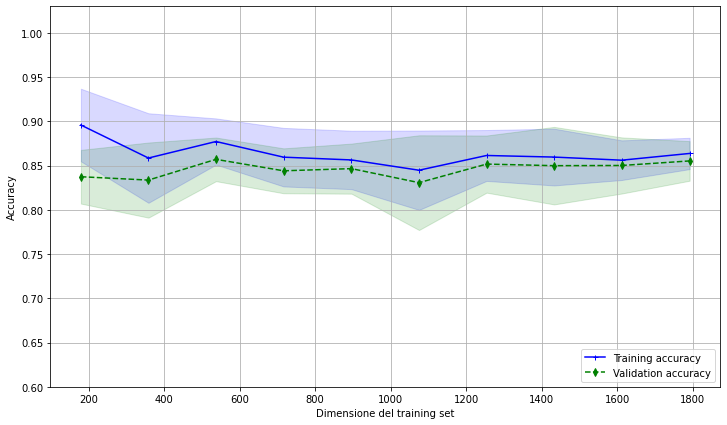

In [14]:
drawAccuracy(train_size, train_scores, test_scores)

In [15]:
voting_estimators.append(("Perceptron", estimator))
final_scores.append(("Perceptron", scores, train_size, train_scores, test_scores))

## Logistic Regression

In [16]:
estimator = LogisticRegression(max_iter=1000, n_jobs = -1)

param_grid = {"C": [0.01, 0.1, 1, 2, 3], "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

C:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


{'C': 3, 'solver': 'liblinear'}


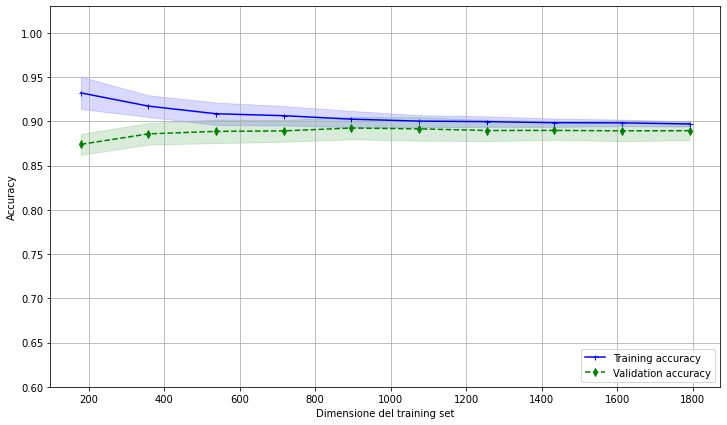

In [17]:
drawAccuracy(train_size, train_scores, test_scores)

In [18]:
voting_estimators.append(("Logistic Regression", estimator))
final_scores.append(("Logistic Regression", scores, train_size, train_scores, test_scores))

## SVC

In [21]:
estimator = SVC()

param_grid = [
    {'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 5], 'C': [0.01, 0.1, 1, 5]},
    {'kernel': ['poly'], 'degree': [1, 2, 3, 4], 'coef0': [1, 10, 50]}
]
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'coef0': 50, 'degree': 2, 'kernel': 'poly'}


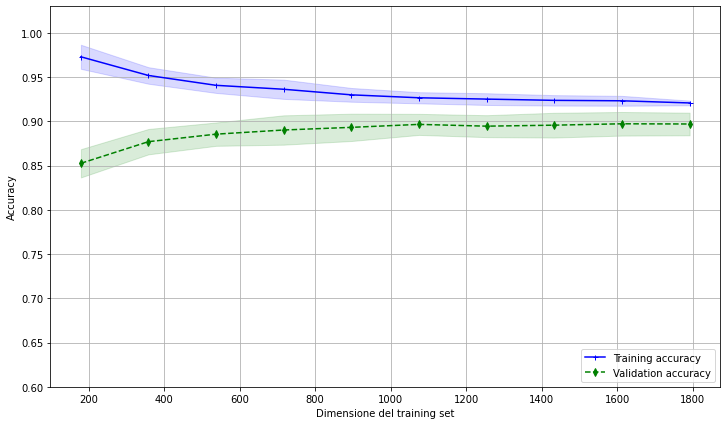

In [22]:
drawAccuracy(train_size, train_scores, test_scores)

In [23]:
voting_estimators.append(("SVC", estimator))
final_scores.append(("SVC", scores, train_size, train_scores, test_scores))

## Decision Tree

In [26]:
estimator = DecisionTreeClassifier(random_state=42)

param_grid = {"splitter": ["best", "random"], "min_samples_leaf": [2, 5, 10, 20], "max_depth": [15, 20, 25]}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_
best_tree_cls = estimator

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 5, 'splitter': 'random'}


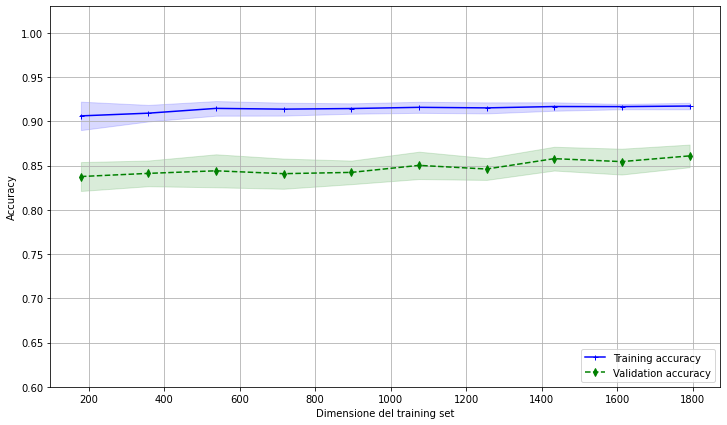

In [27]:
drawAccuracy(train_size, train_scores, test_scores)

In [28]:
voting_estimators.append(("Decision Tree", estimator))
final_scores.append(("Decision Tree", scores, train_size, train_scores, test_scores))

## Bagging

In [29]:
estimator = BaggingClassifier(best_tree_cls, n_estimators=250, n_jobs=-1)

param_grid = {"max_samples": [250, 500, 1000], "bootstrap": [True, False]}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'bootstrap': False, 'max_samples': 1000}


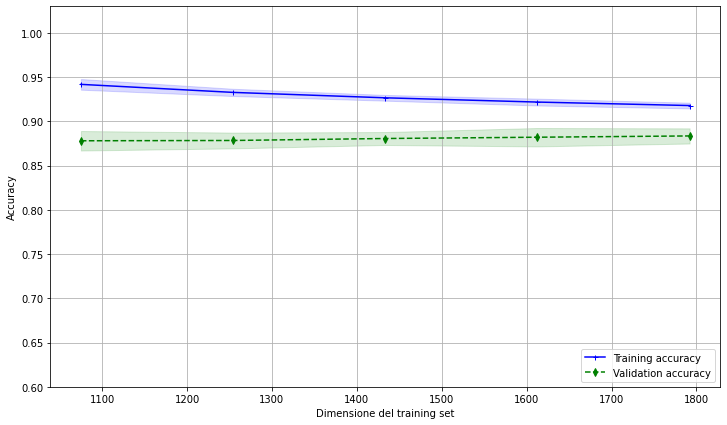

In [30]:
drawAccuracy(train_size, train_scores, test_scores)

In [31]:
voting_estimators.append(("Bagging", estimator))
final_scores.append(("Bagging", scores, train_size, train_scores, test_scores))

## Ada Boost

In [32]:
estimator = AdaBoostClassifier(best_tree_cls, n_estimators=250, random_state=42)

param_grid = {"algorithm": ['SAMME', 'SAMME.R'], "learning_rate": [0.1, 1, 2, 10]}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.1}


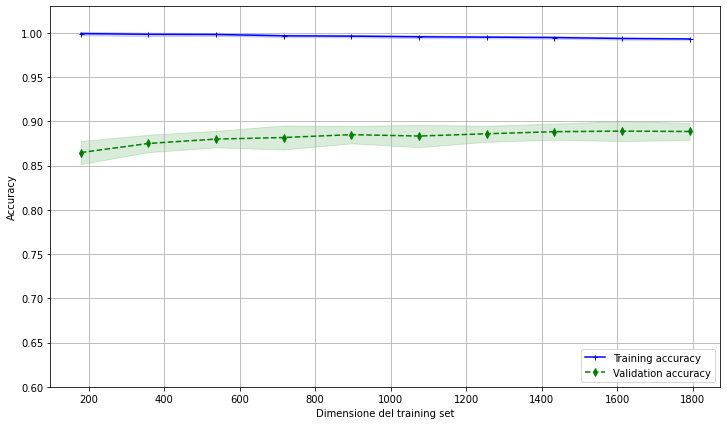

In [33]:
drawAccuracy(train_size, train_scores, test_scores)

In [34]:
voting_estimators.append(("Ada Boost", estimator))
final_scores.append(("Ada Boost", scores, train_size, train_scores, test_scores))

## Gradient Boosting

In [35]:
estimator = GradientBoostingClassifier(n_estimators=250)

param_grid = {"min_samples_leaf": [1, 5, 10], "max_features": [5, 10, 20], "max_leaf_nodes": [2, 3, 4]}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'max_features': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 10}


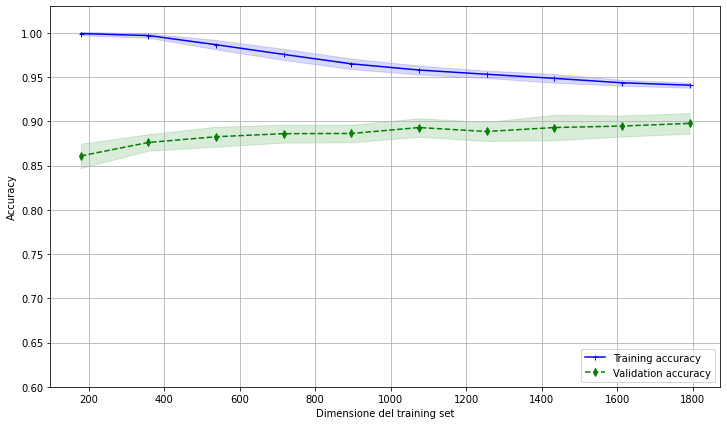

In [36]:
drawAccuracy(train_size, train_scores, test_scores)

In [37]:
voting_estimators.append(("Gradient Boosting", estimator))
final_scores.append(("Gradient Boosting", scores, train_size, train_scores, test_scores))

## Random Forest

In [38]:
estimator = RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

param_grid = {"min_samples_leaf": [1, 2, 5, 10], "max_features": [5, 10, 20], "max_leaf_nodes": [2, 3, 4]}
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring= 'f1', n_jobs = -1)
grid_search.fit(X=feature_matrix, y=dataset_label)
estimator = grid_search.best_estimator_

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)
train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)
print(grid_search.best_params_)

{'max_features': 20, 'max_leaf_nodes': 4, 'min_samples_leaf': 10}


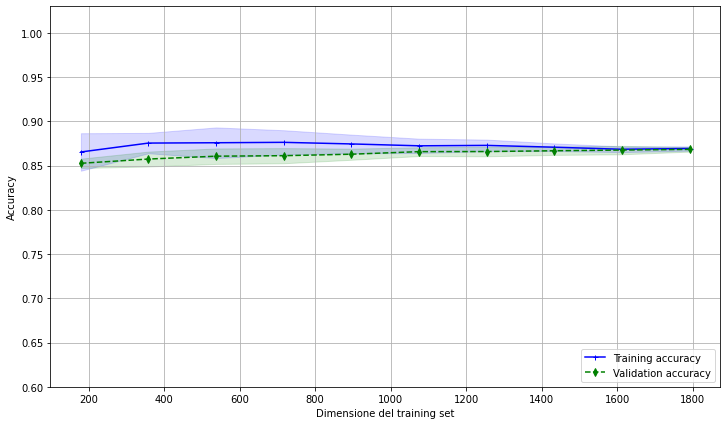

In [39]:
drawAccuracy(train_size, train_scores, test_scores)

In [40]:
voting_estimators.append(("Random Forest", estimator))
final_scores.append(("Random Forest", scores, train_size, train_scores, test_scores))

## Voting Classifier

In [41]:
estimator = VotingClassifier(estimators=voting_estimators, voting='hard')

scores = cross_validate(estimator, X=feature_matrix, y=dataset_label, cv = cv, scoring = scoring, n_jobs=-1)

train_size, train_scores, test_scores = learning_curve(estimator, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = cv, n_jobs = -1)

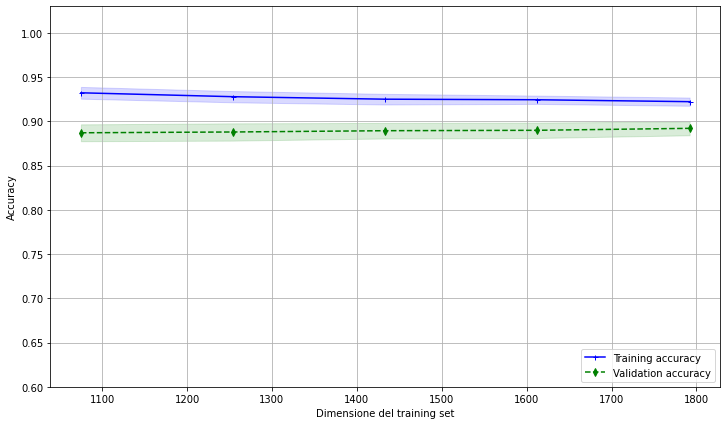

In [42]:
drawAccuracy(train_size, train_scores, test_scores)

In [43]:
final_scores.append(("Voting Classifier", scores, train_size, train_scores, test_scores))

## Neural Network

Per ogni split la rete neurale è stata allenata su 100 epoche (anche se osservando il grafico probabilemente ne sarebbero bastate molte meno dato che già dopo una decina di epoche tutte le metriche iniziano a oscillare intorno a un valore).

In [44]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec+K.epsilon()))

In [45]:
def build_model(n_hidden=2, n_neurons=[36, 10], learning_rate=3e-3, input_shape=feature_matrix.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons[layer]))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['acc', precision, recall, f1])
    return model

In [46]:
keras_reg = KerasClassifier(build_model, metrics=['acc', precision, recall, f1], epochs=100)

In [47]:
np.random.seed(42)
rand = lambda min, max: np.random.randint(min,max)
param_distribs = [{
    "model__n_hidden": [1],
    "model__n_neurons": [[rand(20, 51)] for _ in range(10)],
    "optimizer__learning_rate": [3e-4, 3e-3, 3e-2]},
    {"model__n_hidden": [2],
    "model__n_neurons": [[rand(15, 41), rand(10, 21)] for _ in range(10)],
    "optimizer__learning_rate": [3e-4, 3e-3, 3e-2]},
    {"model__n_hidden": [3],
    "model__n_neurons": [[rand(10, 31), rand(10, 21), rand(3, 11)] for _ in range(10)],
    "optimizer__learning_rate": [3e-4, 3e-3, 3e-2]}
]

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, scoring='f1', cv=cv, verbose=0, n_jobs=-1, random_state=42)
rnd_search_cv.fit(feature_matrix, dataset_label, verbose=0)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=42, test_size=0.2,
            train_size=None),
                   estimator=KerasClassifier(epochs=100, metrics=['acc', <function precision at 0x000001ABCCAF8E50>, <function recall at 0x000001ABCCAF8DC0>, <function f1 at 0x000001ABCCAF8EE0>], model=<function build_model at 0x000001ABCCAF9240>),
                   n_jobs=-1,
                   param_distributions=[{'m...
                                         'model__n_neurons': [[33, 16],
                                                              [25, 20],
                                                              [38, 14],
                                                              [18, 17],
                                                              [38, 12],
                                                              [36, 14],
                                                              [16, 17],
                                                  

In [48]:
best_dnn_params = rnd_search_cv.best_params_
best_dnn_params

{'optimizer__learning_rate': 0.03,
 'model__n_neurons': [38, 12],
 'model__n_hidden': 2}

In [49]:
scores = {"test_accuracy":[],"test_precision":[],"test_recall":[],"test_f1":[],"test_loss":[]}
for train_index, test_index in cv.split(feature_matrix, dataset_label):
    X_train = feature_matrix[train_index]
    X_test = feature_matrix[test_index]
    y_train = dataset_label[train_index]
    y_test = dataset_label[test_index]
    
    model = build_model(n_hidden=best_dnn_params["model__n_hidden"], n_neurons=best_dnn_params["model__n_neurons"], learning_rate=best_dnn_params["optimizer__learning_rate"])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    loss_score, accuracy_score, precision_score, recall_score, f1_score = model.evaluate(X_test, y_test, verbose=0)

    scores["test_accuracy"].append(accuracy_score)
    scores["test_precision"].append(precision_score)
    scores["test_recall"].append(recall_score)
    scores["test_f1"].append(f1_score)
    scores["test_loss"].append(loss_score)

Visualizzo solo l'ultima split.

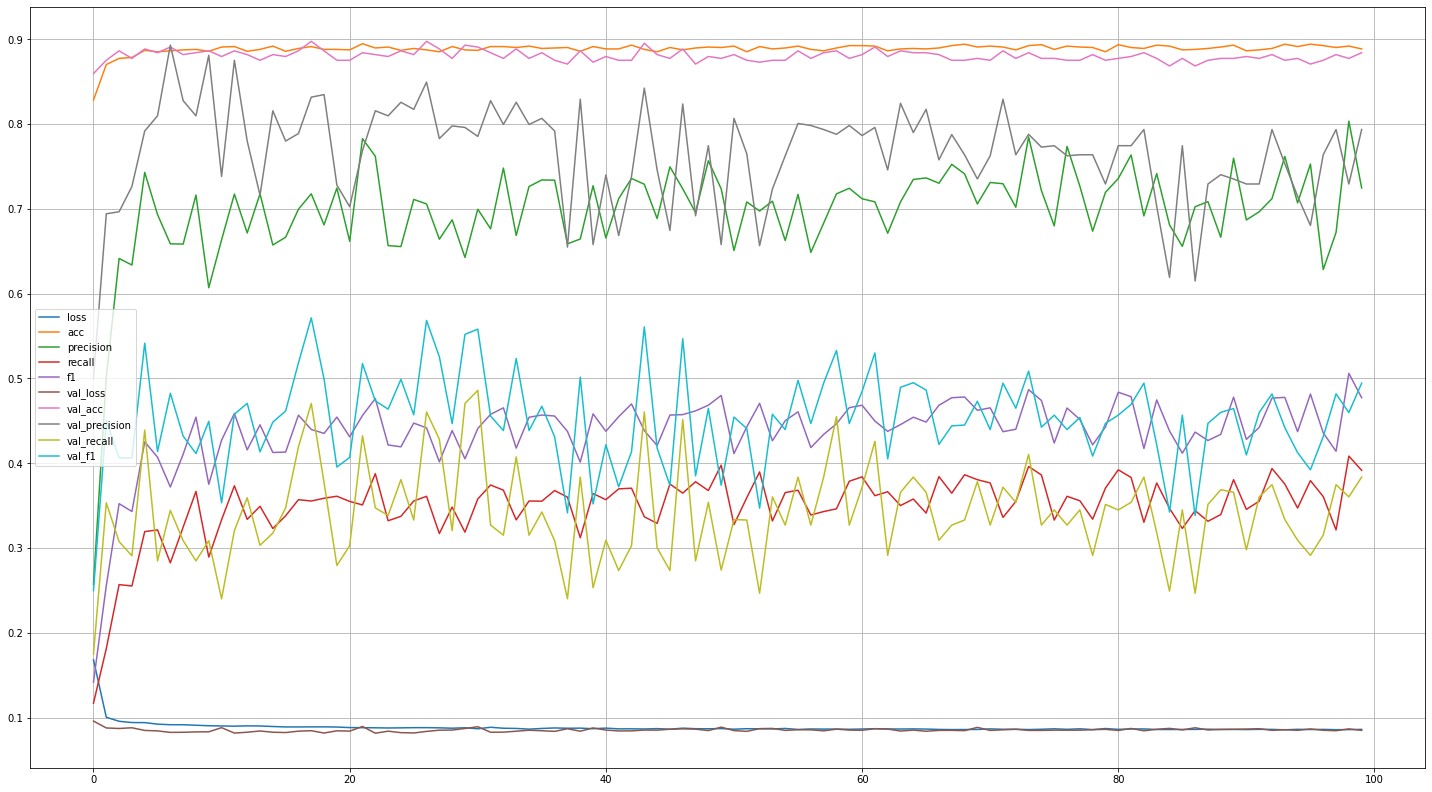

In [50]:
pd.DataFrame(history.history).plot(figsize=(25,14))
plt.grid(True)

In [51]:
scores = {k: np.array(v) for k, v in scores.items()}
final_scores.append(("Neural Network", scores, None, None, None))

# Cross-validation

Per prima cosa confronto tutti i modelli per vedere quali hanno overfitting e quali hanno un accuracy più alta.

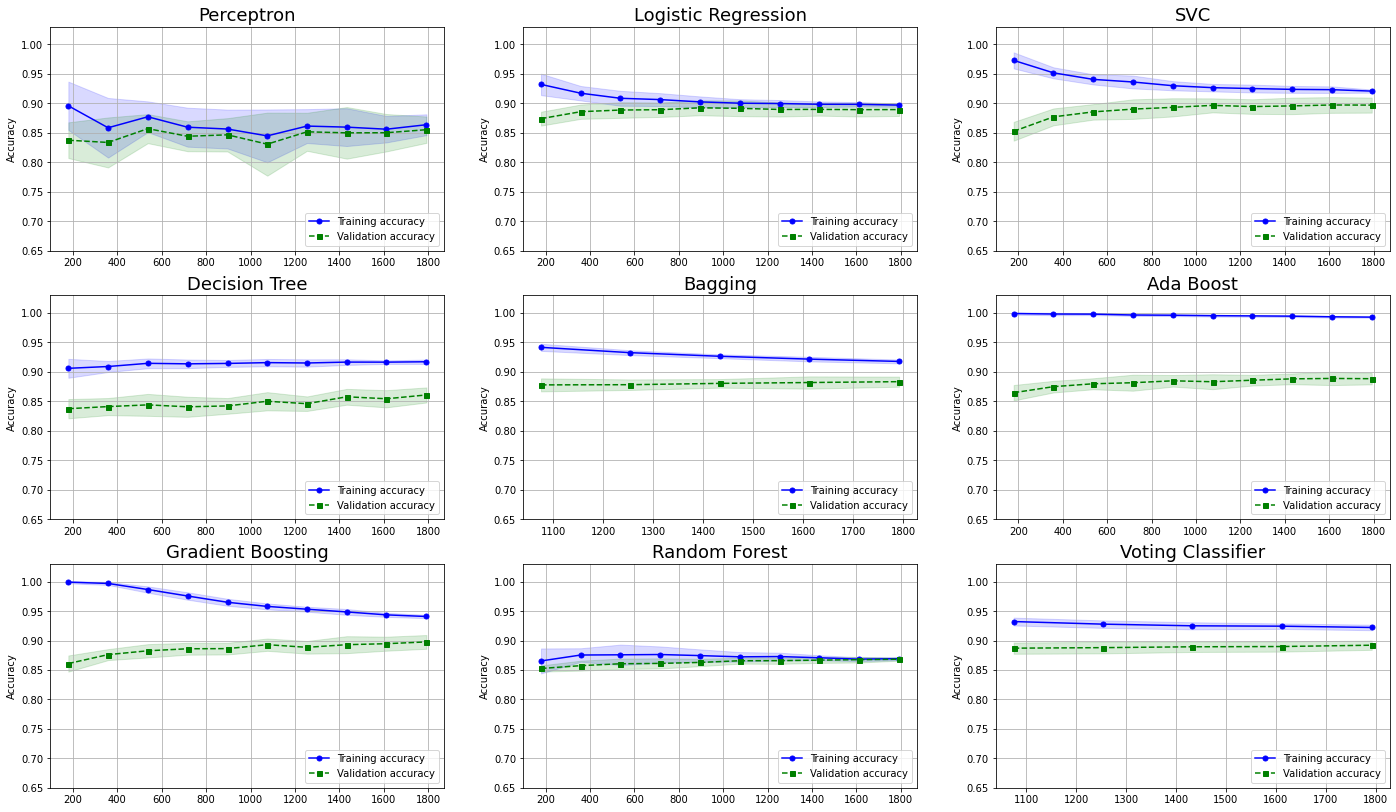

In [52]:
fig= plt.figure(figsize=(24, 14))
for i, (name, _, train_size, train_scores, test_scores) in enumerate(final_scores):
    if name == "Neural Network":
        continue
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    ax = fig.add_subplot(3,3,1+i)
    ax.plot(train_size, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_size,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_size, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_size,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.65,1.03))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=18)

In [53]:
columns = [colName.title() for colName in scoring]+["Loss"]
final_table = pd.DataFrame(columns=columns)
for (name, score, train_size, train_scores, test_scores) in final_scores:
    data = []
    for metric in scoring:
        data.append(score['test_'+metric].mean())
    data.append(score['test_loss'].mean()) if name=="Neural Network" else data.append(None)
    final_table = pd.concat([final_table, pd.DataFrame([data], columns=columns, index=[name])])

In [54]:
dfstyle = [dict(selector="th", props=[('font-size', '20pt')]),dict(selector="td", props=[('font-size', '20pt')])]
final_table.style.set_table_styles(dfstyle).background_gradient(axis=0, cmap=sns.light_palette("green", as_cmap=True))

,Accuracy,Precision,Recall,F1,Loss
Perceptron,0.855246,0.538903,0.470896,0.486226,nan
Logistic Regression,0.889397,0.701098,0.457463,0.551898,nan
SVC,0.896987,0.733608,0.494030,0.588906,nan
Decision Tree,0.860938,0.548038,0.405970,0.465303,nan
Bagging,0.882143,0.735341,0.333582,0.456897,nan
Ada Boost,0.888504,0.704457,0.443284,0.542316,nan
Gradient Boosting,0.894308,0.742171,0.455970,0.563420,nan
Random Forest,0.868304,0.814271,0.162687,0.268155,nan
Voting Classifier,0.891518,0.811684,0.360448,0.497720,nan
Neural Network,0.887500,0.696781,0.352532,0.441786,0.087564


<AxesSubplot:>

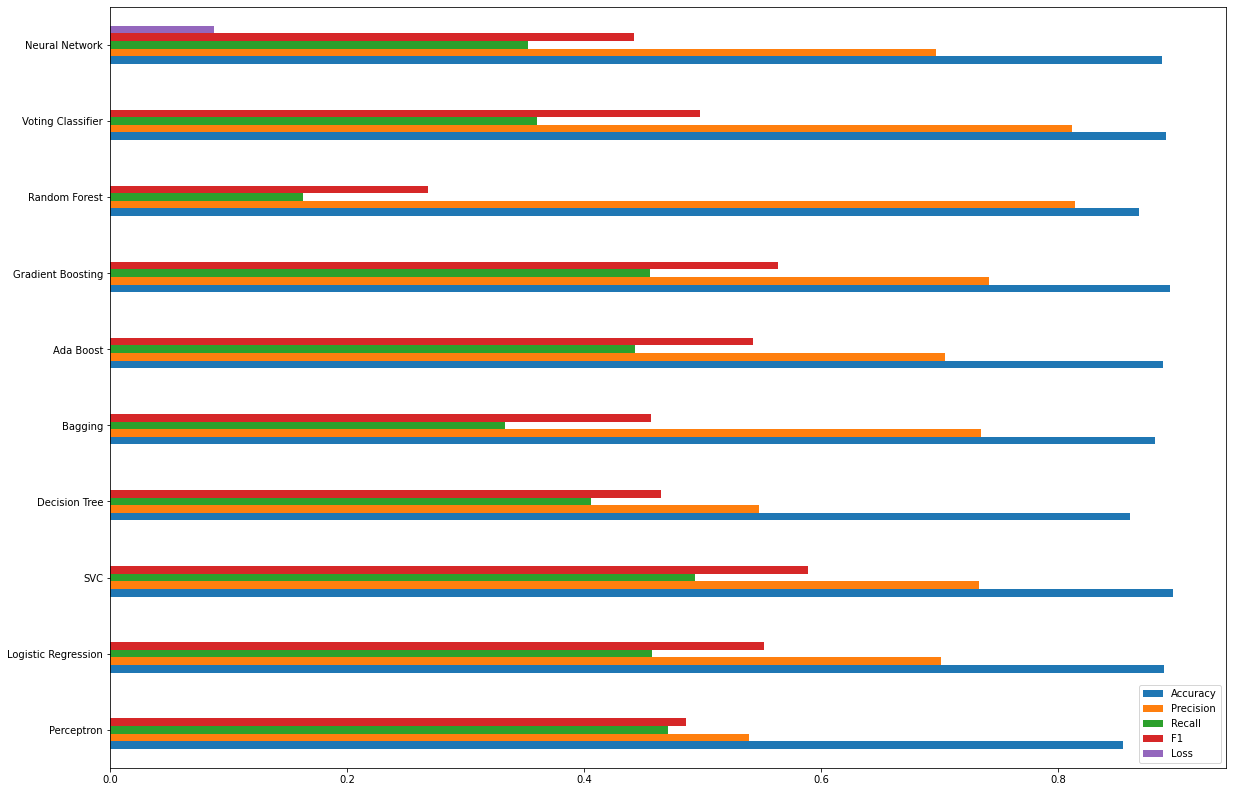

In [55]:
final_table.plot(kind="barh", figsize=(20,14))

In [56]:
def visualize_performance(ax, scores, metric):
    data_score = []
    labels = []
    for (name, score, _, _, _) in scores:
        labels.append(name)
        data_score.append(score['test_'+metric])
    sns.boxplot(ax = ax, data = data_score, whis = [5, 95], palette = "vlag", orient = 'h')
    ax.set(yticklabels=labels)

Il perceptron sembra essere molto instabile e non consistente nei risultati come si poteva già intuire dalla sua learning curve.

Random Forest ha una recall nettamente inferiore agli altri (e di conseguenza anche una f1).

Tutti gli altri hanno una distribuzione dei risultati abbastanza simile, possiamo quindi affermare che siano abbastanza consistenti e quindi affidabili.

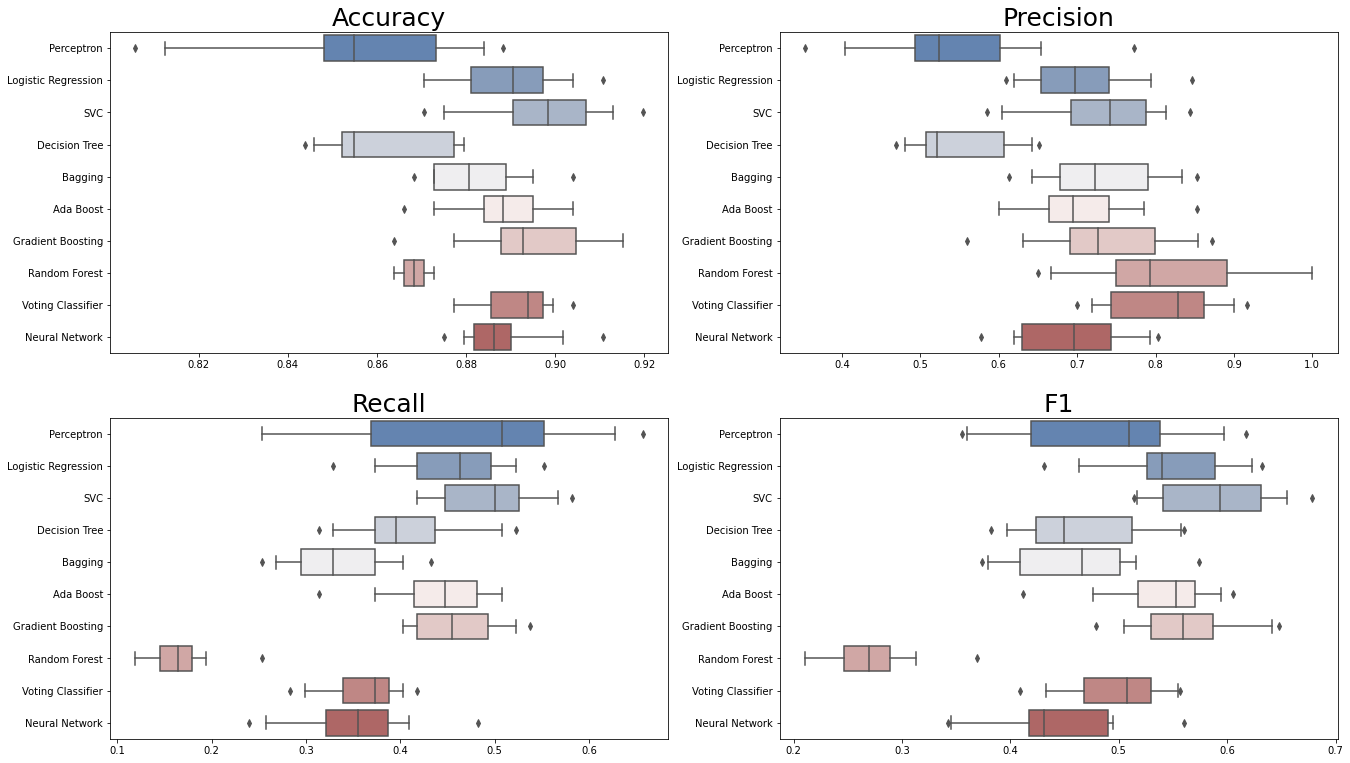

In [57]:
fig= plt.figure(figsize=(22, 13))
for i, metric in enumerate(scoring):
    ax = fig.add_subplot(2,2,1+i)
    visualize_performance(ax, final_scores, metric)
    ax.set_title(metric.title(), fontsize=25)

Text(0.5, 1.0, 'Loss')

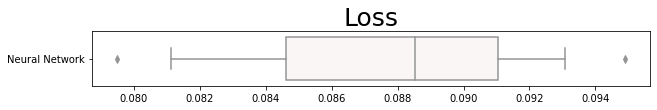

In [58]:
fig= plt.figure(figsize=(10, 1))
ax = fig.add_subplot()
nn_score = [score for score in final_scores if "test_loss" in score[1]]
visualize_performance(ax, nn_score, "loss")
ax.set_title("Loss", fontsize=25)

# Conclusioni

ALTA PRECISION = Alta probabilità di successo ma rischio di non contattare potenziali clienti interessati all'offerta

ALTA RECALL = Probabilità più bassa di successo ma rischio minore di non contattare potenziali clienti interessati all'offerta 

Per il contesto nel quale ci troviamo probabilmente preferiremmo avere una *f1* alta, ma se dovessimo scegliere, una *recall* alta è preferibile rispetto a una *precision* alta dato che contattare potenziali clienti interessati all'offerta porterebbe un profitto maggiore al costo di scomodare clienti non interessati. Un aspetto importante da valutare però è il costo della campagna di marketing e quindi stimare, in base alla *recall* del modello scelto, se sia più probabile spendere più soldi in marketing ma riuscire a coprire le spese e andare in profitto avendo più clienti che accettano l'offerta o viceversa. Nel nostro caso le *recall* dei nostri modelli non sono molto alte quindi darei più peso alla *precision*. 

Il modello ***Ada boost*** ha ottenuto dei buoni risultati ma avendo un overfitting enorme non è molto affidabile per andare in produzione.

Il modello ***Voting Classifier*** ha dato dei buoni risultati, con una scarsa recall però. Probabilmente un voting classifier con solo i modelli migliori avrebbe dato risultati migliori di tutti i modelli precedenti.

Infine i modelli che probabilmente porterebbero il maggior profitto all'azienda sono il ***Gradient Boosting***, le ***SVM*** e la ***Logistic Regresssion*** dato che tutti i modelli hanno poco overfitting (e i valori di training e di test sembrano convergere con l'aumentare dei dati, quindi probabilmente al crescere dei dati diminuisce l'overfitting), hanno una distribuzione dei risultati pressochè simile e anche dei risultati molto simili. La ***Logistic Regression*** sembra lavorare bene anche con pochi dati.